# TD12: Yeast cell cycle model of J. Tyson 1991 
- reaction system from BioModels http://biomodels.org
- FO-LTL(Rlin) trace analysis
- FO-LTL(Rlin) quantitative model-checking
- sensitivity
- robustness
- parameter search

F. Fages, 9 Feb 2017

In [1]:
load(cell_cycle_tyson).

In [2]:
list_model.

MA(k1)for _=>Cyclin.
MA(k2)for Cyclin=>_.
MA(k3)for Cyclin+Cdc2P=>Cdc2CyclinPP.
MA(k4p)for Cdc2CyclinPP=>Cdc2CyclinP.
MA(k4)for Cdc2CyclinPP=[2*Cdc2CyclinP]=>Cdc2CyclinP.
MA(k5)for Cdc2CyclinP=>Cdc2CyclinPP.
MA(k6)for Cdc2CyclinP=>CyclinP+Cdc2.
MA(k7)for CyclinP=>_.
MA(k8)for Cdc2=>Cdc2P.
MA(k9)for Cdc2P=>Cdc2.
present(Cdc2,1).
present(Cdc2P,0).
present(Cyclin,0).
present(Cdc2CyclinPP,0).
present(Cdc2CyclinP,0).
present(CyclinP,0).
parameter(
  k1 = 0.015,
  k2 = 0,
  k3 = 200,
  k4p = 0.018,
  k4 = 180,
  k5 = 0,
  k6 = 1,
  k7 = 0.6,
  k8 = 10000,
  k9 = 100
).
function(
  CyclinTot = Cyclin+CyclinP+Cdc2CyclinPP+Cdc2CyclinP,
  Cdc2Tot = Cdc2CyclinPP+Cdc2CyclinP+Cdc2P+Cdc2
).


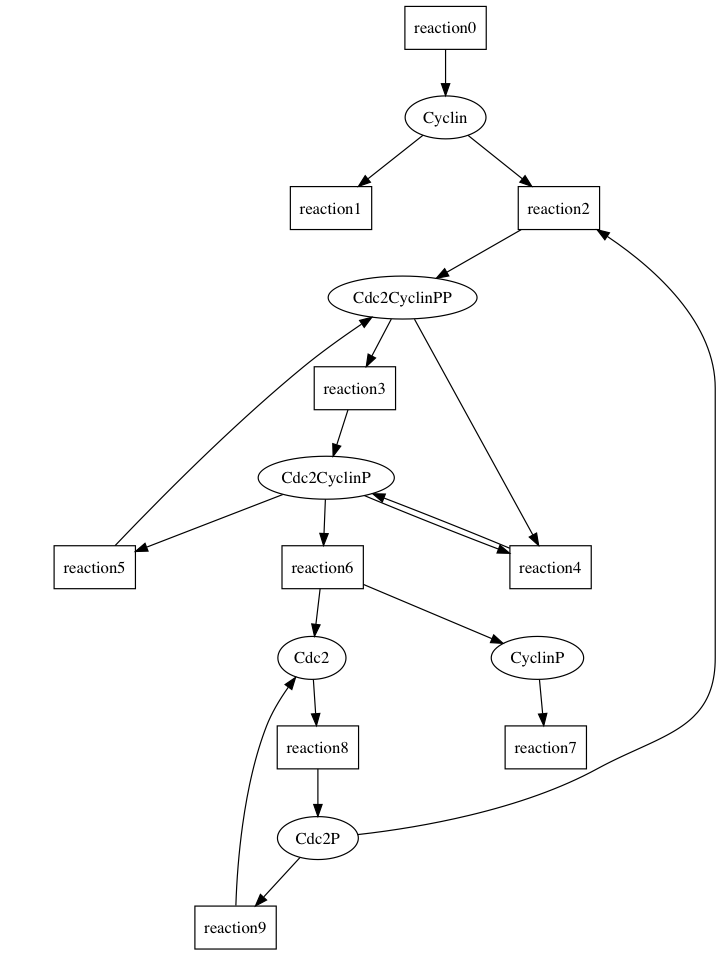

In [3]:
draw_reactions.

In [4]:
search_conservations.

No complex invariant found


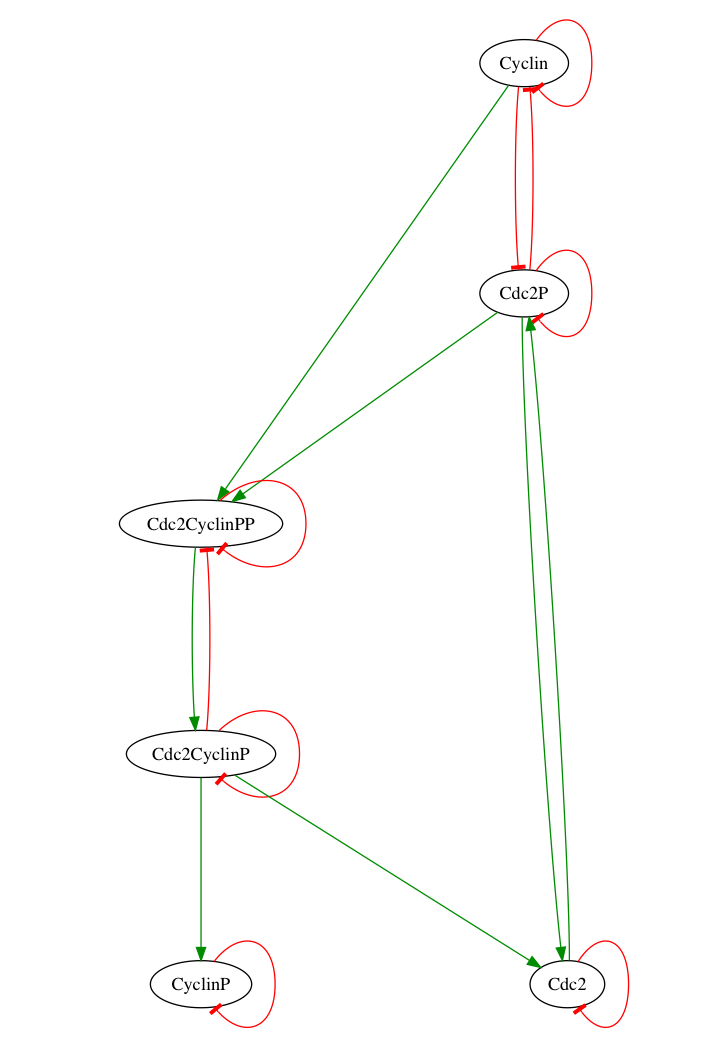

In [5]:
draw_influences.

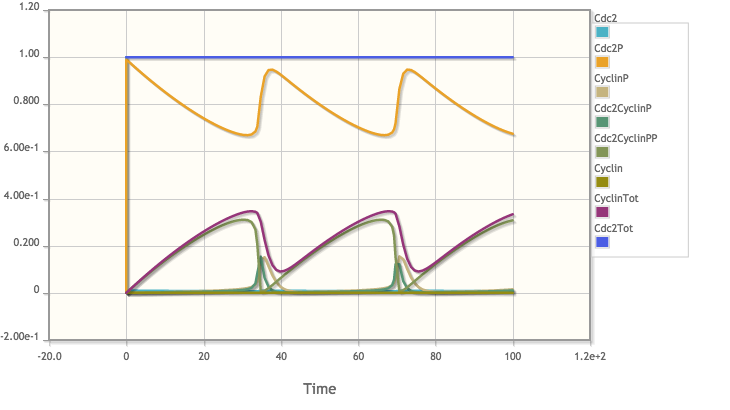

In [6]:
option(time:100). numerical_simulation. plot.

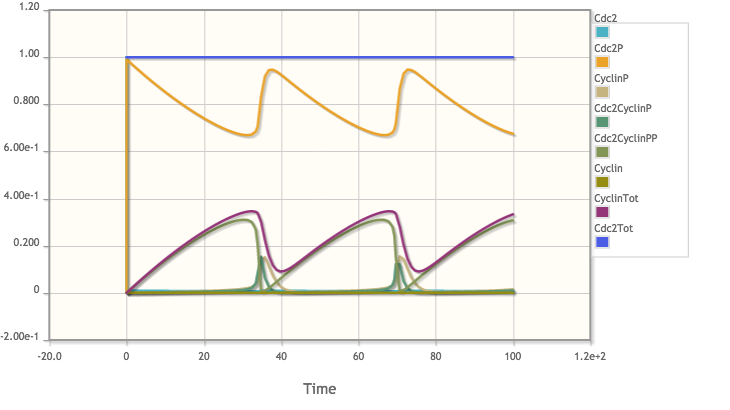

In [7]:
option(method:bsimp). numerical_simulation. plot.

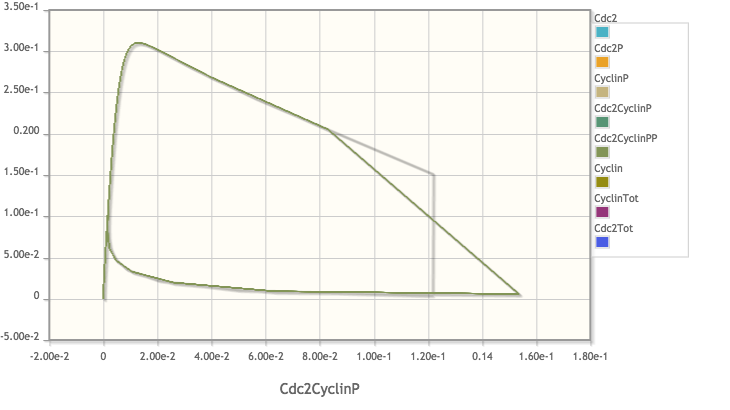

In [8]:
plot(show: Cdc2CyclinPP, against: Cdc2CyclinP).

FO-LTL(Rlin) formula without free variables are evaluated on a trace by returning its **truth value**.

In [9]:
validity_domain(F(Cdc2CyclinPP>=0.3)).

true


In [10]:
validity_domain(F(Cdc2CyclinPP>=0.5)).

false


FO-LTL(Rlin) formulae containing free variables are evaluated on a trace by returning the **validity domain** of the free variables.

In [11]:
validity_domain(F(Cdc2CyclinPP>=P)).

P<=0.31053


In [12]:
validity_domain(G(Cdc2CyclinPP>=X)).

X<=0


In [13]:
validity_domain(F(Cdc2CyclinPP<=X)).

X>=0


In [14]:
validity_domain(G(Cdc2CyclinPP<=X)).

X>=0.31053


FO-LTL(Rlin) formulae containing free variables given with objective values are evaluated on a trace by returning a **continuous satisfaction degree** in the interval [0,1] (obtained from the distance between between the objective point and the validity domain).

In [15]:
satisfaction_degree(reachable(Cdc2CyclinPP>=X), [X -> 0.3]).

1.000000


In [16]:
satisfaction_degree(reachable(Cdc2CyclinPP>=X), [X -> 0.5]).

0.840711


In [17]:
satisfaction_degree(reachable(Cdc2CyclinPP>=X), [X -> 5]).

0.175763


The formula below defines an **amplitude constraint** which constrains the free variable A to be less or equal to the amplitude of variation of a molecule.

In [18]:
validity_domain(exists(C, F(Cdc2CyclinPP<=C /\ F(Cdc2CyclinPP>=C+A)))).

A<=0.31053


In [19]:
validity_domain(exists(C, F(Cdc2CyclinPP<=C /\ F(Cdc2CyclinPP>=C+A /\ Time>=T)))).

T<=100/\A<=0.30757\/T<=66.802/\A<=0.30943\/T<=65.802/\A<=0.31047\/T<=30.418/\A<=0.31053


# Amplitude constraints
- define in FO-LTL(Rlin) an amplitude constraint to constrain a variable to be greater or equal to the amplitude.

# Local optima
Local maxima can be defined as below.

In [20]:
validity_domain(exists(X, F(Cdc2CyclinPP<V /\ X(Cdc2CyclinPP=V /\ X(Cdc2CyclinPP<V))))).

V=0.31047\/V=0.31053


In [21]:
validity_domain(exists(X, F(Cdc2CyclinPP<V /\ X(Cdc2CyclinPP=V /\ Time= T /\ X(Cdc2CyclinPP<V))))).

T=65.802/\V=0.31047\/T=30.418/\V=0.31053


# Parameter search
- play with the initial concentration parameter values using %slider
- play with the kinetic parameter values using %slider
- use search_parameters to get an amplitude of 0.5 for Cdc2CyclinPP 

In [22]:
%slider k1 k2 k3 k4 k4p k5 k6 k7 k8 k9

k1 
 
 
 0.015 
 
 k2 
 
 
 0 
 
 k3 
 
 
 200 
 
 k4 
 
 
 180 
 
 k4p 
 
 
 0.018 
 
 k5 
 
 
 0 
 
 k6 
 
 
 1 
 
 k7 
 
 
 0.6 
 
 k8 
 
 
 10000 
 
 k9 
 
 
 100

[0] parameter(k1=7.787749)
[1] parameter(k4=237.975463)


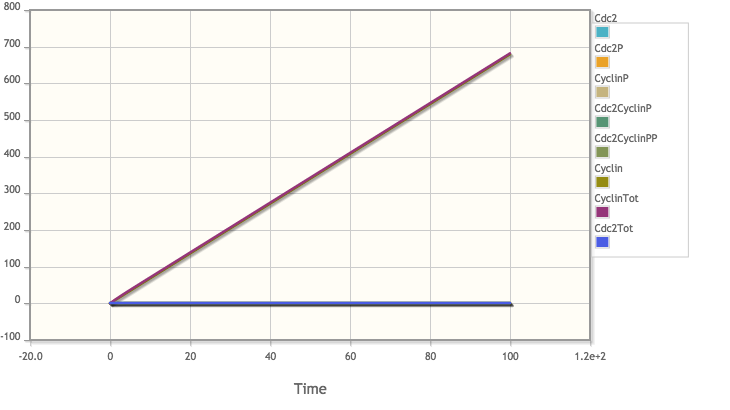

In [23]:
search_parameters(exists(C, F(Cdc2CyclinPP<=C /\ F(Cdc2CyclinPP>=C+A))), [0<=k1<=10, 0<=k4<=300], [A -> 0.5]).
numerical_simulation. plot(show: Cdc2CyclinPP).

# Period and phase constraints
- define the period constraint
- use search_parameter to get oscillations with a pseudo period of 24h 
- define the phase constraint